 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [2]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [3]:
import numpy as np
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)
mnist_traindata = mnist_traindata.reshape(60000, 784)
#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

mnist_testdata = mnist_testdata.reshape(10000, 784)
# print(mnist_trainlabel)

100%|██████████| 9912422/9912422 [00:00<00:00, 418675279.14it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 57193434.29it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 142164807.63it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12624604.88it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


In [30]:
def ReLu(inp):
    return np.maximum(0, inp)

# Gradient of ReLU activation function
def gradReLu(inp):
    return np.where(inp < 0, 0, 1)

# Softmax activation function
def softmax(a3):
    exp_values = np.exp(a3)
    sum_exp_values = np.sum(exp_values)
    outp = exp_values/sum_exp_values
    return outp

# Gradient of softmax activation function
def gradSoftmax(a3):
    softmax_out = softmax(a3)
    return softmax_out * (1 - softmax_out)

# Forward propagation of data
def fwdPropagate(inputs, weights,act_f):
    W1, W2, W3 = weights
    a1 = W1 @ inputs
    z1 = act_f(a1)
    a2 = W2 @ z1
    z2 = act_f(a2)
    a3 = W3 @ z2
    outps = np.array([softmax(a) for a in a3.T])
    return outps.T, z1, z2

# Compute the gradients
def computeGradients(inputs, targets, weights, activations, grad_act_f):
    W1, W2, W3 = weights
    outps, z1, z2 = activations
    num_samples = inputs.shape[1]
    num_classes = W3.shape[0]
    # targets = np.eye(num_classes)[targets]
    tar = np.zeros_like(outps)
    tar[targets,np.arange(outps.shape[1])]=1
    targets = tar
    # print(targets)
    # J = -np.sum(targets @ np.log(outps)) / num_samples
    a2 = W2 @ z1
    a1 = W1 @ inputs
    # grad_a3 = (1/outps.T * (targets)).T * grad_act_f(outps) / num_samples
    grad_a3 = (outps - targets)
    grad_W3 = grad_a3 @ z2.T/num_samples
    grad_z2 = W3.T @ grad_a3
    grad_a2 = grad_z2 * grad_act_f(a2)
    grad_W2 = grad_a2 @ z1.T/num_samples
    grad_z1 = W2.T @ grad_a2
    grad_a1 = grad_z1 * grad_act_f(a1)
    grad_W1 = grad_a1 @ inputs.T/num_samples

    return [grad_W1, grad_W2, grad_W3]
# Update the parameters using gradients and learning rate
def applyGradients(weights, gradients, learning_rate):
    updated_weights = [w - learning_rate * grad for w, grad in zip(weights, gradients)]
    return updated_weights

In [5]:
def ReLu(inp):
    return np.maximum(0, inp)

# Gradient of ReLU activation function
def gradReLu(inp):
    return np.where(inp < 0, 0, 1)

# Softmax activation function
def softmax(a3):
    exp_values = np.exp(a3)
    sum_exp_values = np.sum(exp_values)
    outp = exp_values/sum_exp_values
    return outp

# Gradient of softmax activation function
def gradSoftmax(a3):
    softmax_out = softmax(a3)
    return softmax_out * (1 - softmax_out)

# Forward propagation of data
def fwdPropagate(inputs, weights,act_f):
    W1, W2, W3 = weights
    a1 = W1 @ inputs
    z1 = act_f(a1)
    a2 = W2 @ z1
    z2 = act_f(a2)
    a3 = W3 @ z2
    outps = np.array([softmax(a) for a in a3.T])
    return outps.T, z1, z2

# Compute the gradients
def computeGradients(inputs, targets, weights, activations, grad_act_f):
    W1, W2, W3 = weights
    outps, z1, z2 = activations
    num_samples = inputs.shape[1]
    num_classes = W3.shape[0]
    # targets = np.eye(num_classes)[targets]
    tar = np.zeros_like(outps)
    tar[targets,np.arange(outps.shape[1])]=1
    targets = tar
    # print(targets)
    # J = -np.sum(targets @ np.log(outps)) / num_samples
    a2 = W2 @ z1
    a1 = W1 @ inputs
    # grad_a3 = (1/outps.T * (targets)).T * grad_act_f(outps) / num_samples
    grad_a3 = (outps - targets)
    grad_W3 = grad_a3 @ z2.T/num_samples
    grad_z2 = W3.T @ grad_a3
    grad_a2 = grad_z2 * grad_act_f(a2)
    grad_W2 = grad_a2 @ z1.T/num_samples
    grad_z1 = W2.T @ grad_a2
    grad_a1 = grad_z1 * grad_act_f(a1)
    grad_W1 = grad_a1 @ inputs.T/num_samples

    return [grad_W1, grad_W2, grad_W3]
# Update the parameters using gradients and learning rate
def applyGradients(weights, gradients, learning_rate):
    updated_weights = [w - learning_rate * grad for w, grad in zip(weights, gradients)]
    return updated_weights

# Train the network
def train_network(inputs, targets,act_f,grad_act_f,train_val_split = 0.9,learning_rate=0.005, epochs=5, batch_size=128):
    # Initialize weights
    W1 = np.random.randn(512, 784) * 0.01
    W2 = np.random.randn(512, 512) * 0.01
    W3 = np.random.randn(10, 512) * 0.01
    weights = [W1, W2, W3]
    num_samples = inputs.shape[0]
    num_batches = int(np.ceil(train_val_split*num_samples // batch_size))
    train_size = int(train_val_split * num_samples)
    indices = np.random.permutation(num_samples)
    train_indices, val_indices = indices[:train_size], indices[train_size:]
    x_train, y_train = inputs[train_indices], targets[train_indices]
    x_val, y_val = inputs[val_indices], targets[val_indices]
    for epoch in range(epochs):
        # Shuffle the data

        indices = np.random.permutation(int(train_val_split * len(inputs)))
        # if (train_val_split*num_samples) batch_size
        for batch in range(num_batches):
            start_idx = batch * batch_size
            end_idx = min((batch + 1) * batch_size, train_size)
            batch_inputs = x_train[start_idx:end_idx].T
            batch_targets = y_train[start_idx:end_idx].T

            # Forward propagation
            activations = fwdPropagate(batch_inputs, weights,act_f)

            # Compute gradients
            gradients = computeGradients(batch_inputs, batch_targets, weights, activations,grad_act_f)

            # Update weights
            weights = applyGradients(weights, gradients, learning_rate)


        #Compute outpus on trianing data
        outputs = fwdPropagate(x_train.T, weights,act_f)
        train_outputs = outputs[0]

        #Compute training accuracy, and training error
        train_predictions = np.argmax(train_outputs, axis=0)
        train_accuracy = np.mean(train_predictions == y_train)
        train_error = 1 - train_accuracy

        #Compute outputs on validation data
        val_inputs, val_targets = x_val, y_val
        voutputs = fwdPropagate(val_inputs.T, weights,act_f)
        val_outputs = voutputs[0]
        #Compute validation accuracy, and validation error
        val_predictions = np.argmax(val_outputs, axis=0)
        val_accuracy = np.mean(val_predictions == val_targets)
        val_error = 1 - val_accuracy
        #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
        print(f"Epoch {epoch+1}/{epochs}, Training Error: {train_error*100:.4f}, Training Accuracy: {train_accuracy*100:.4f}, Validation Error: {val_error*100:.4f}, Validation Accuracy: {val_accuracy*100:.4f}")
    #Save the parameters of network
    return weights

#Call the training function to train the network
weights = train_network(mnist_traindata,mnist_trainlabel,ReLu,gradReLu,0.9,0.001,5,128)
#Compute outputs on validation data
voutputs = fwdPropagate(mnist_testdata.T, weights,ReLu)
val_outputs = voutputs[0]
#Compute validation accuracy, and validation error
val_predictions = np.argmax(val_outputs, axis=0)
val_accuracy = np.mean(val_predictions == mnist_testlabel)
val_error = 1 - val_accuracy
print(f"Overall Validation Error: {val_error*100:.4f}, Overall Validation Accuracy: {val_accuracy*100:.4f}")


Epoch 1/5, Training Error: 8.0093, Training Accuracy: 91.9907, Validation Error: 7.9167, Validation Accuracy: 92.0833
Epoch 2/5, Training Error: 6.0963, Training Accuracy: 93.9037, Validation Error: 6.3833, Validation Accuracy: 93.6167
Epoch 3/5, Training Error: 5.0019, Training Accuracy: 94.9981, Validation Error: 5.5167, Validation Accuracy: 94.4833
Epoch 4/5, Training Error: 4.2667, Training Accuracy: 95.7333, Validation Error: 4.8500, Validation Accuracy: 95.1500
Epoch 5/5, Training Error: 3.7481, Training Accuracy: 96.2519, Validation Error: 4.1667, Validation Accuracy: 95.8333
Overall Validation Error: 4.1800, Overall Validation Accuracy: 95.8200


<b> Report your observations </b>

1.As the number of epochs increases the error decreases

2.Accuracy of validation set is in between of 90-95 percentage

3.validation error is greater than training error




<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [33]:
##################################################
#Train the network with different activation functions
##################################################
def sigmoidal(inps):
  return 1/(1 + np.exp(-inps))

def sigmoid_gradient(z):
    return sigmoidal(z) * (1 - sigmoidal(z))

def Tanh(inps):
  return np.tanh(inps)

def Tanh_gradient(z):
    return 1 - np.tanh(z)**2

def LeakyReLU(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def LeakyRelu_gradient(z, alpha=0.01):
    return np.where(z >= 0, 1, alpha)

In [172]:
##################################################
#Train the network with different activation functions
##################################################
def sigmoidal(inps):
  return 1/(1 + np.exp(-inps))

def sigmoid_gradient(z):
    return sigmoidal(z) * (1 - sigmoidal(z))

def Tanh(inps):
  return np.tanh(inps)

def Tanh_gradient(z):
    return 1 - np.tanh(z)**2

def LeakyReLU(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def LeakyRelu_gradient(z, alpha=0.01):
    return np.where(z >= 0, 1, alpha)
print('Sigmoidal\n')
weights1 = train_network(mnist_traindata,mnist_trainlabel,sigmoidal,sigmoid_gradient,0.9,0.001,3,128)
print('Tanh\n')
weights2 = train_network(mnist_traindata,mnist_trainlabel,Tanh,Tanh_gradient,0.9,0.001,3,128)
print('LeakyReLu\n')
weights3 = train_network(mnist_traindata,mnist_trainlabel,LeakyReLU,LeakyRelu_gradient,0.9,0.001,3,128)
print('ReLu\n')
weights4 = train_network(mnist_traindata,mnist_trainlabel,ReLu,gradReLu,0.9,0.001,3,128)

##################################################
#Evaluate the performance on MNIST test data
##################################################

voutputs = fwdPropagate(mnist_testdata.T, weights1,sigmoidal)
val_outputs = voutputs[0]
#Compute validation accuracy, and validation error
val_predictions = np.argmax(val_outputs, axis=0)
val_accuracy = np.mean(val_predictions == mnist_testlabel)
val_error = 1 - val_accuracy
print(f"sigmoidal Validation Error: {val_error*100:.4f}, Validation Accuracy: {val_accuracy*100:.4f}")


voutputs = fwdPropagate(mnist_testdata.T, weights2,Tanh)
val_outputs = voutputs[0]
#Compute validation accuracy, and validation error
val_predictions = np.argmax(val_outputs, axis=0)
val_accuracy = np.mean(val_predictions == mnist_testlabel)
val_error = 1 - val_accuracy
print(f"Tanh Validation Error: {val_error*100:.4f}, Validation Accuracy: {val_accuracy*100:.4f}")


voutputs = fwdPropagate(mnist_testdata.T, weights4,ReLu)
val_outputs = voutputs[0]
#Compute validation accuracy, and validation error
val_predictions = np.argmax(val_outputs, axis=0)
val_accuracy = np.mean(val_predictions == mnist_testlabel)
val_error = 1 - val_accuracy
print(f"ReLu Validation Error: {val_error*100:.4f}, Validation Accuracy: {val_accuracy*100:.4f}")


voutputs = fwdPropagate(mnist_testdata.T, weights3,LeakyReLU)
val_outputs = voutputs[0]
#Compute validation accuracy, and validation error
val_predictions = np.argmax(val_outputs, axis=0)
val_accuracy = np.mean(val_predictions == mnist_testlabel)
val_error = 1 - val_accuracy
print(f"LeakyRelu Validation Error: {val_error*100:.4f}, Validation Accuracy: {val_accuracy*100:.4f}")



Sigmoidal

Epoch 1/3, Training Error: 88.7204, Training Accuracy: 11.2796, Validation Error: 89.1500, Validation Accuracy: 10.8500
Epoch 2/3, Training Error: 88.7204, Training Accuracy: 11.2796, Validation Error: 89.1500, Validation Accuracy: 10.8500
Epoch 3/3, Training Error: 88.7204, Training Accuracy: 11.2796, Validation Error: 89.1500, Validation Accuracy: 10.8500
Tanh

Epoch 1/3, Training Error: 28.2704, Training Accuracy: 71.7296, Validation Error: 29.1833, Validation Accuracy: 70.8167
Epoch 2/3, Training Error: 25.0019, Training Accuracy: 74.9981, Validation Error: 25.1833, Validation Accuracy: 74.8167
Epoch 3/3, Training Error: 18.4815, Training Accuracy: 81.5185, Validation Error: 18.3167, Validation Accuracy: 81.6833
LeakyReLu

Epoch 1/3, Training Error: 8.2611, Training Accuracy: 91.7389, Validation Error: 9.0000, Validation Accuracy: 91.0000
Epoch 2/3, Training Error: 6.1407, Training Accuracy: 93.8593, Validation Error: 7.2667, Validation Accuracy: 92.7333
Epoch 3/3, Train

<b> Report your observations </b>

1.As the epoch number increases Error decreases

2.Accuracies Sigmoid < Tanh < ReLu < LeakyRelu

3.This is beacause the derivates of Sigmoida and Tanh are < 1 which results in vanishing gradients whereas ReLu and LeakyReLu are 1 or 0



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
##################################################
#Train the network using Adam optimizer
##################################################
def adam_optimiser(weights, gradients, learning_rate, t, m=None, v=None, beta1=0.9, beta2=0.999, epsilon=1e-8):
    if m is None and v is None:
        m = [np.zeros_like(param) for param in weights]
        v = [np.zeros_like(param) for param in weights]

    # Adam parameters update
    t += 1
    for i in range(len(weights)):
        m[i] = beta1 * m[i] + (1 - beta1) * gradients[i]
        v[i] = beta2 * v[i] + (1 - beta2) * (gradients[i] ** 2)
        m_hat = m[i] / (1 - beta1 ** t)
        v_hat = v[i] / (1 - beta2 ** t)
        weights[i] -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

    return weights, t, m, v

W1 = np.random.randn(512, 784) * 0.01
W2 = np.random.randn(512, 512) * 0.01
W3 = np.random.randn(10, 512) * 0.01

weights = [W1,W2,W3]
activations = fwdPropagate(mnist_traindata.T, weights,ReLu)
gradients = computeGradients(mnist_traindata.T,mnist_trainlabel,weights,activations,gradReLu)
epochs = 3
batch_size = 128
train_val_split = 0.9
inputs = mnist_traindata
targets = mnist_trainlabel
num_samples = mnist_traindata.shape[0]
num_batches = int(train_val_split * num_samples // batch_size)
train_size = int(train_val_split * num_samples)
indices = np.random.permutation(num_samples)
train_indices, val_indices = indices[:train_size], indices[train_size:]
x_train, y_train = inputs[train_indices], targets[train_indices]
x_val, y_val = inputs[val_indices], targets[val_indices]
t = 0
m = None
v= None
for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(int(0.9 * len(mnist_traindata)))
        for batch in range(num_batches+1):
            start_idx = batch * batch_size
            end_idx = min((batch + 1) * batch_size, int(0.9 * len(mnist_traindata)))
            batch_inputs = x_train[start_idx:end_idx].T
            batch_targets = y_train[start_idx:end_idx].T
            # Forward propagation
            activations = fwdPropagate(batch_inputs, weights,LeakyReLU)
            gradients = computeGradients(batch_inputs,batch_targets,weights,activations,gradReLu)
            weights,t,m,v = adam_optimiser(weights, gradients, 0.001,t,m,v)

outputs = fwdPropagate(mnist_traindata.T, weights,ReLu)
train_outputs = outputs[0]
#Compute training accuracy, and training error
train_predictions = np.argmax(train_outputs, axis=0)
train_accuracy = np.mean(train_predictions == mnist_trainlabel)
train_error = 1 - train_accuracy
# print('Adam\'s Optimisation Training Accuracy : ',train_accuracy*100)
outputs = fwdPropagate(mnist_testdata.T, weights,ReLu)
test_outputs = outputs[0]
#Compute training accuracy, and training error
test_predictions = np.argmax(test_outputs, axis=0)
test_accuracy = np.mean(test_predictions == mnist_testlabel)
test_error = 1 - test_accuracy
print('Adam\'s Optimisation Validation Accuracy : ',test_accuracy*100)
##################################################
#Compare the accuracies and report your observations
##################################################
print(f"SGD Validation Accuracy: {val_accuracy*100:.4f}")







Adam's Optimisation Validation Accuracy :  95.44
SGD Validation Accuracy: 94.4300


<b> Report your observations </b>

1.Accuracy for Adam's Optimisation is more than SGD accuracy

2.Bias Correction: Adam includes bias correction terms to adjust the parameter updates, this helps in stabilizing the training process and achieving faster

3.Adam adapts the learning rates for each parameter individually




<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
##################################################
#Training with weight regularization
##################################################
def computeGradients(inputs, targets, weights, activations, grad_act_f):
    lam = 0.01
    W1, W2, W3 = weights
    outps, z1, z2 = activations
    J = 0.5 * np.sum((outps - targets)**2) + lam * (np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2))
    a2 = W2 @ z1
    a1 = W1 @ inputs
    num_samples = inputs.shape[1]
    num_classes = W3.shape[0]
    tar = np.zeros_like(outps)
    tar[targets,np.arange(outps.shape[1])]=1
    targets = tar
    # Compute the gradients using backpropagation with L2 regularization
    grad_a3 = (outps - targets)
    grad_W3 = grad_a3 @ z2.T/num_samples + 2*lam * W3
    grad_z2 = W3.T @ grad_a3
    grad_a2 = grad_z2 * grad_act_f(a2)
    grad_W2 = grad_a2 @ z1.T/num_samples + 2*lam * W2
    grad_z1 = W2.T @ grad_a2
    grad_a1 = grad_z1 * grad_act_f(a1)
    grad_W1 = grad_a1 @ inputs.T/num_samples + 2*lam * W1
    return [grad_W1, grad_W2, grad_W3]

weights = train_network(mnist_traindata,mnist_trainlabel,LeakyReLU,LeakyRelu_gradient,0.9,0.001,3,128)
#Compute outputs on validation data
# print('W1 ',weights)
voutputs = fwdPropagate(mnist_testdata.T, weights,LeakyReLU)
val_outputs = voutputs[0]
#Compute validation accuracy, and validation error
val_predictions = np.argmax(val_outputs, axis=0)
val_accuracy = np.mean(val_predictions == mnist_testlabel)
val_error = 1 - val_accuracy
print(f"For Regularisation Validation Error: {val_error:.4f}, Validation Accuracy: {val_accuracy:.4f}")





Epoch 1/3, Training Error: 0.0818, Training Accuracy: 0.9182, Validation Error: 0.0892, Validation Accuracy: 0.9108
Epoch 2/3, Training Error: 0.0626, Training Accuracy: 0.9374, Validation Error: 0.0710, Validation Accuracy: 0.9290
Epoch 3/3, Training Error: 0.0524, Training Accuracy: 0.9476, Validation Error: 0.0622, Validation Accuracy: 0.9378
For Regularisation Validation Error: 0.0538, Validation Accuracy: 0.9462


In [ ]:
##################################################
#Training with dropout strategy
##################################################
def generate_dropout_mask(layer_size, dropout_prob):
    return np.random.binomial(1, 1 - dropout_prob, size=layer_size)

def fwdPropagate(inputs, weights, act_f, dropout_prob):
    W1, W2, W3 = weights
    a1 = W1 @ inputs
    z1 = act_f(a1)
    mask1 = generate_dropout_mask(z1.shape, dropout_prob)
    z1 *= mask1
    a2 = W2 @ z1
    z2 = act_f(a2)
    mask2 = generate_dropout_mask(z2.shape, dropout_prob)
    z2 *= mask2
    a3 = W3 @ z2
    outps = np.array([softmax(a) for a in a3.T])
    return outps.T, z1, z2, mask1, mask2

def computeGradients(inputs, targets, weights, activations, grad_act_f):
    W1, W2, W3 = weights
    outps, z1, z2,mask1,mask2 = activations
    num_samples = inputs.shape[1]
    num_classes = W3.shape[0]
    tar = np.zeros_like(outps)
    tar[targets, np.arange(outps.shape[1])] = 1
    targets = tar
    a1 = W1 @ inputs
    a2 = W2 @ z1
    grad_a3 = (outps - targets)
    grad_W3 = grad_a3 @ z2.T / num_samples
    grad_z2 = W3.T @ grad_a3
    grad_a2 = grad_z2 * grad_act_f(a2)
    grad_a2 *= mask2
    grad_W2 = grad_a2 @ z1.T / num_samples
    grad_z1 = W2.T @ grad_a2
    grad_a1 = grad_z1 * grad_act_f(a1)
    grad_a1 *= mask1
    grad_W1 = grad_a1 @ inputs.T / num_samples

    return [grad_W1, grad_W2, grad_W3]

def train_network(inputs, targets,act_f,grad_act_f,drop_out,train_val_split = 0.9,learning_rate=0.005, epochs=5, batch_size=128):
    # Initialize weights
    W1 = np.random.randn(512, 784) * 0.01
    W2 = np.random.randn(512, 512) * 0.01
    W3 = np.random.randn(10, 512) * 0.01
    weights = [W1, W2, W3]
    num_samples = inputs.shape[0]
    num_batches = int(train_val_split*num_samples // batch_size)
    train_size = int(train_val_split * num_samples)
    indices = np.random.permutation(num_samples)
    train_indices, val_indices = indices[:train_size], indices[train_size:]
    x_train, y_train = inputs[train_indices], targets[train_indices]
    x_val, y_val = inputs[val_indices], targets[val_indices]
    for epoch in range(epochs):
        # Shuffle the data

        indices = np.random.permutation(int(train_val_split * len(inputs)))

        for batch in range(num_batches+1):
            start_idx = batch * batch_size
            end_idx = min((batch + 1) * batch_size, train_size)
            batch_inputs = x_train[start_idx:end_idx].T
            batch_targets = y_train[start_idx:end_idx].T

            # Forward propagation
            activations = fwdPropagate(batch_inputs, weights,act_f,drop_out)

            # Compute gradients
            gradients = computeGradients(batch_inputs, batch_targets, weights, activations,grad_act_f)

            # Update weights
            weights = applyGradients(weights, gradients, learning_rate)


        #Compute outpus on trianing data
        outputs = fwdPropagate(x_train.T, weights,act_f,drop_out)
        train_outputs = outputs[0]

        #Compute training accuracy, and training error
        train_predictions = np.argmax(train_outputs, axis=0)
        train_accuracy = np.mean(train_predictions == y_train)
        train_error = 1 - train_accuracy

        #Compute outputs on validation data
        val_inputs, val_targets = x_val, y_val
        voutputs = fwdPropagate(val_inputs.T, weights,act_f,drop_out)
        val_outputs = voutputs[0]
        #Compute validation accuracy, and validation error
        val_predictions = np.argmax(val_outputs, axis=0)
        val_accuracy = np.mean(val_predictions == val_targets)
        val_error = 1 - val_accuracy
        #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
        print(f"Epoch {epoch+1}/{epochs}, Training Error: {train_error:.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Error: {val_error:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    #Save the parameters of network
    return weights
weights = train_network(mnist_traindata,mnist_trainlabel,LeakyReLU,LeakyRelu_gradient,0.2,0.9,0.001,3,128)
#Compute outputs on validation data
# print('W1 ',weights)
voutputs = fwdPropagate(mnist_testdata.T, weights,LeakyReLU,0.2)
val_outputs = voutputs[0]
#Compute validation accuracy, and validation error
val_predictions = np.argmax(val_outputs, axis=0)
val_accuracy = np.mean(val_predictions == mnist_testlabel)
val_error = 1 - val_accuracy
print(f"For Dropout Validation Error: {val_error:.4f}, Validation Accuracy: {val_accuracy:.4f}")



Epoch 1/3, Training Error: 0.1190, Training Accuracy: 0.8810, Validation Error: 0.1175, Validation Accuracy: 0.8825
Epoch 2/3, Training Error: 0.0935, Training Accuracy: 0.9065, Validation Error: 0.0912, Validation Accuracy: 0.9088
Epoch 3/3, Training Error: 0.0783, Training Accuracy: 0.9217, Validation Error: 0.0815, Validation Accuracy: 0.9185
For Dropout Validation Error: 0.0767, Validation Accuracy: 0.9233


In [ ]:

##################################################
#Training with early stopping criterion
##################################################
# Train the network

def fwdPropagate(inputs, weights,act_f):
    W1, W2, W3 = weights
    a1 = W1 @ inputs
    z1 = act_f(a1)
    a2 = W2 @ z1
    z2 = act_f(a2)
    a3 = W3 @ z2
    outps = np.array([softmax(a) for a in a3.T])
    return outps.T, z1, z2

# Compute the gradients
def computeGradients(inputs, targets, weights, activations, grad_act_f):
    W1, W2, W3 = weights
    outps, z1, z2 = activations
    num_samples = inputs.shape[1]
    num_classes = W3.shape[0]
    # targets = np.eye(num_classes)[targets]
    tar = np.zeros_like(outps)
    tar[targets,np.arange(outps.shape[1])]=1
    targets = tar
    # print(targets)
    # J = -np.sum(targets @ np.log(outps)) / num_samples
    a2 = W2 @ z1
    a1 = W1 @ inputs
    # grad_a3 = (1/outps.T * (targets)).T * grad_act_f(outps) / num_samples
    grad_a3 = (outps - targets)
    grad_W3 = grad_a3 @ z2.T/num_samples
    grad_z2 = W3.T @ grad_a3
    grad_a2 = grad_z2 * grad_act_f(a2)
    grad_W2 = grad_a2 @ z1.T/num_samples
    grad_z1 = W2.T @ grad_a2
    grad_a1 = grad_z1 * grad_act_f(a1)
    grad_W1 = grad_a1 @ inputs.T/num_samples

    return [grad_W1, grad_W2, grad_W3]

def train_network(inputs, targets,act_f,grad_act_f,train_val_split = 0.9,learning_rate=0.005, epochs=5, batch_size=128):
    # Initialize weights
    v_errors = []
    W1 = np.random.randn(512, 784) * 0.01
    W2 = np.random.randn(512, 512) * 0.01
    W3 = np.random.randn(10, 512) * 0.01
    weights = [W1, W2, W3]
    num_samples = inputs.shape[0]
    num_batches = int(train_val_split*num_samples // batch_size)
    train_size = int(train_val_split * num_samples)
    indices = np.random.permutation(num_samples)
    train_indices, val_indices = indices[:train_size], indices[train_size:]
    x_train, y_train = inputs[train_indices], targets[train_indices]
    x_val, y_val = inputs[val_indices], targets[val_indices]
    val_error1 = 1
    for epoch in range(epochs):
        # Shuffle the data

        indices = np.random.permutation(int(train_val_split * len(inputs)))

        for batch in range(num_batches+1):
            start_idx = batch * batch_size
            end_idx = min((batch + 1) * batch_size, train_size)
            batch_inputs = x_train[start_idx:end_idx].T
            batch_targets = y_train[start_idx:end_idx].T

            # Forward propagation
            activations = fwdPropagate(batch_inputs, weights,act_f)

            # Compute gradients
            gradients = computeGradients(batch_inputs, batch_targets, weights, activations,grad_act_f)

            # Update weights
            weights = applyGradients(weights, gradients, learning_rate)


        #Compute outpus on trianing data
        outputs = fwdPropagate(x_train.T, weights,act_f)
        train_outputs = outputs[0]

        #Compute training accuracy, and training error
        train_predictions = np.argmax(train_outputs, axis=0)
        train_accuracy = np.mean(train_predictions == y_train)
        train_error = 1 - train_accuracy

        #Compute outputs on validation data
        val_inputs, val_targets = x_val, y_val
        voutputs = fwdPropagate(val_inputs.T, weights,act_f)
        val_outputs = voutputs[0]
        #Compute validation accuracy, and validation error
        val_predictions = np.argmax(val_outputs, axis=0)
        val_accuracy = np.mean(val_predictions == val_targets)
        val_error = 1 - val_accuracy
        v_errors.append(val_error)
        if (val_error1 < val_error):
          print('The epoch at which testing_error increases is : ',epoch)
          break
        val_error1 = val_error

        #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
        print(f"Epoch {epoch+1}/{epochs}, Training Error: {train_error:.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Error: {val_error:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    #Save the parameters of network
    return weights , v_errors

weights,v_errors = train_network(mnist_traindata,mnist_trainlabel,LeakyReLU,LeakyRelu_gradient,0.9,0.001,35,128)
#Compute outputs on validation data
# print('W1 ',weights)
voutputs = fwdPropagate(mnist_testdata.T, weights,LeakyReLU)
val_outputs = voutputs[0]
#Compute validation accuracy, and validation error
val_predictions = np.argmax(val_outputs, axis=0)
val_accuracy = np.mean(val_predictions == mnist_testlabel)
val_error = 1 - val_accuracy



Epoch 1/35, Training Error: 0.0812, Training Accuracy: 0.9188, Validation Error: 0.0860, Validation Accuracy: 0.9140
Epoch 2/35, Training Error: 0.0619, Training Accuracy: 0.9381, Validation Error: 0.0675, Validation Accuracy: 0.9325
Epoch 3/35, Training Error: 0.0509, Training Accuracy: 0.9491, Validation Error: 0.0573, Validation Accuracy: 0.9427
Epoch 4/35, Training Error: 0.0438, Training Accuracy: 0.9562, Validation Error: 0.0515, Validation Accuracy: 0.9485
Epoch 5/35, Training Error: 0.0380, Training Accuracy: 0.9620, Validation Error: 0.0467, Validation Accuracy: 0.9533
Epoch 6/35, Training Error: 0.0335, Training Accuracy: 0.9665, Validation Error: 0.0432, Validation Accuracy: 0.9568
Epoch 7/35, Training Error: 0.0295, Training Accuracy: 0.9705, Validation Error: 0.0393, Validation Accuracy: 0.9607
Epoch 8/35, Training Error: 0.0267, Training Accuracy: 0.9733, Validation Error: 0.0382, Validation Accuracy: 0.9618
Epoch 9/35, Training Error: 0.0239, Training Accuracy: 0.9761, V

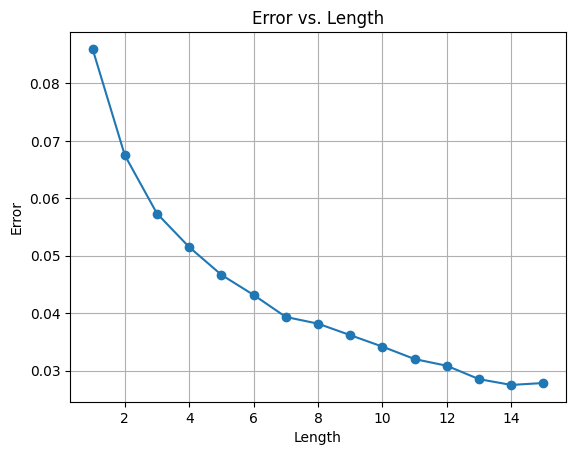

In [ ]:
lengths = np.arange(1,len(v_errors)+1)
plt.plot(lengths, v_errors, marker='o')
plt.xlabel('Length')
plt.ylabel('Error')
plt.title('Error vs. Length')
plt.grid(True)
plt.show()

<b> Report your observations </b>

1.Preventing Overfitting and increses accuracy which is better than normal SGD

2.Dropout operates at the neuron level, randomly deactivating neurons during training to prevent overfitting and better than Traditional SGD

3.Early stopping prevents overfitting by monitoring the model's generalization performance on a validation dataset and stopping training when necessary.This also performs better than SGD



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



(1000, 2)


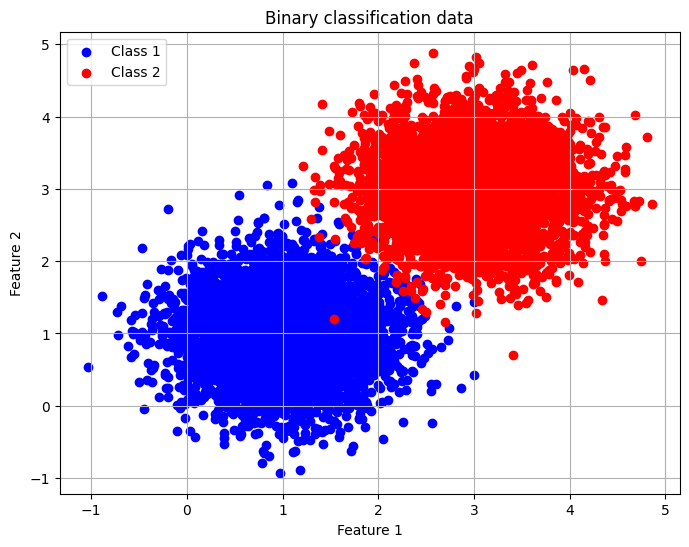

In [23]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])
print(te_data.shape)
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


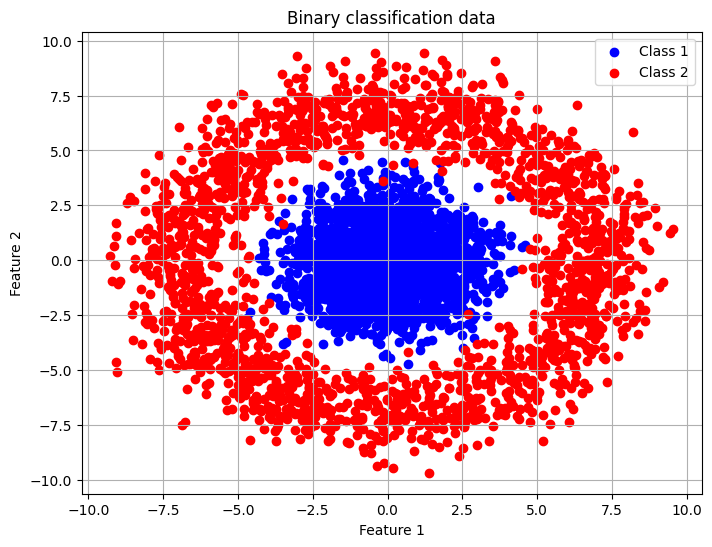

In [24]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)
n_samples = len(class1_data)
n_test = int(n_samples * 0.1)
test_indices = np.random.choice(n_samples, n_test, replace=False)
train_indices = np.setdiff1d(np.arange(n_samples), test_indices)
class1_tr2 = class1_data[train_indices]
class1_te2 = class1_data[test_indices]
class2_tr2 = class2_data[train_indices]
class2_te2 = class2_data[test_indices]

tr_data2 = np.concatenate([class1_tr2,class2_tr2],axis = 0)
tr_targets2 = np.concatenate([np.zeros(len(class1_tr2)), np.ones(len(class2_tr2))])
te_data2 = np.concatenate([class1_te2,class2_te2],axis = 0)
te_targets2 = np.concatenate([np.zeros(len(class1_te2)), np.ones(len(class2_te2))])
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



In [25]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################
def gradient(X, y, w):
    m = len(y)
    z = np.dot(X, w)
    y_pred = sigmoidal(z)
    return 1/m * np.dot(X.T, (y_pred - y))

def hessian(X, w):
    m = X.shape[0]
    z = np.dot(X, w)
    y_pred = sigmoidal(z)
    W = np.diag(y_pred * (1 - y_pred))
    return 1/m * np.dot(X.T, np.dot(W, X))

def update_weights(X, y, w, learning_rate=0.01):
    grad = gradient(X, y, w)
    hess = hessian(X, w)
    inverse_hess = np.linalg.pinv(hess)
    return w - learning_rate * np.dot(inverse_hess, grad)


def Logistic(X_train,Y_train,X_test,num_ite = 100):
  w = np.random.randn(X_train.shape[1])
  for i in range(num_ite):
        w = update_weights(X_train, Y_train, w)
  return w








Accuracy of linearly separable data (Logistic Regression) 88.7


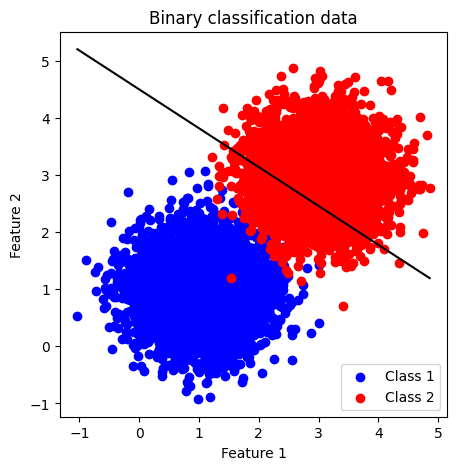

In [27]:
def sigmoidal(inps):
  return 1/(1 + np.exp(-inps))
X = np.hstack((np.ones((len(tr_data), 1)), tr_data))
X_te = np.hstack((np.ones((len(te_data), 1)), te_data))
w = Logistic(X,tr_targets,X_te)
z = np.dot(X_te, w)
Y_pred = sigmoidal(z)
Y_pred = (Y_pred >= 0.5).astype(int)
acc = np.mean(te_targets == Y_pred)
print('Accuracy of linearly separable data (Logistic Regression)',acc*100)
# print(X.shape)
y = tr_targets
plt.figure(figsize=(5, 5))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
x_values = np.array([np.min(tr_data[:, 0]), np.max(tr_data[:, 0])])
y_values = -(w[0] + w[1] * x_values) / w[2]
plt.plot(x_values, y_values, label='Decision Boundary', color='black')
plt.show()

##################################################
#Compare the performance of both the models on linearly separable data
##################################################





Accuracy of linearly separable data (Neural_network) 43.6


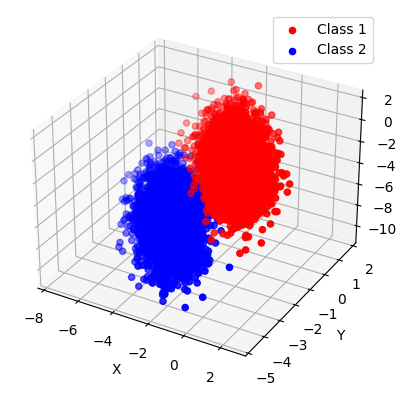

In [31]:
##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################
# Forward propagation of data

def fwdPropagate(inputs, weights,act_f):
    W1, W2, W3 = weights
    a1 = W1 @ inputs
    z1 = act_f(a1)
    a2 = W2 @ z1
    z2 = act_f(a2)
    a3 = W3 @ z2
    outps = np.array([softmax(a) for a in a3.T])
    return outps.T, z1, z2

# Compute the gradients
def computeGradients(inputs, targets, weights, activations, grad_act_f):
    W1, W2, W3 = weights
    outps, z1, z2 = activations
    num_samples = inputs.shape[1]
    num_classes = W3.shape[0]
    tar = np.zeros_like(outps)
    tar[targets.astype(int),np.arange(outps.shape[1])] = 1
    targets = tar
    # print(targets)
    # J = -np.sum(targets @ np.log(outps)) / num_samples
    a2 = W2 @ z1
    a1 = W1 @ inputs
    # grad_a3 = (1/outps.T * (targets)).T * grad_act_f(outps) / num_samples
    grad_a3 = (outps - targets)
    grad_W3 = grad_a3 @ z2.T/num_samples
    grad_z2 = W3.T @ grad_a3
    grad_a2 = grad_z2 * grad_act_f(a2)
    grad_W2 = grad_a2 @ z1.T/num_samples
    grad_z1 = W2.T @ grad_a2
    grad_a1 = grad_z1 * grad_act_f(a1)
    grad_W1 = grad_a1 @ inputs.T/num_samples

    return [grad_W1, grad_W2, grad_W3]

def train_network(inputs, targets,act_f,grad_act_f,train_val_split = 0.9,learning_rate=0.0001, epochs=10, batch_size=1200):
    # Initialize weights
    W1 = np.random.randn(3, 2)
    W2 = np.random.randn(3, 3)
    W3 = np.random.randn(2, 3)
    weights = [W1, W2, W3]
    num_samples = inputs.shape[0]
    num_batches = int(np.ceil(train_val_split*num_samples // batch_size))
    train_size = int(train_val_split * num_samples)
    indices = np.random.permutation(num_samples)
    train_indices, val_indices = indices[:train_size], indices[train_size:]
    x_train, y_train = inputs[train_indices], targets[train_indices]
    x_val, y_val = inputs[val_indices], targets[val_indices]
    for epoch in range(epochs):
        # Shuffle the data

        indices = np.random.permutation(int(train_val_split * len(inputs)))

        for batch in range(num_batches+1):
            start_idx = batch * batch_size
            end_idx = min((batch + 1) * batch_size, train_size)
            batch_inputs = x_train[start_idx:end_idx].T
            batch_targets = y_train[start_idx:end_idx].T
            # print(batch_inputs.shape)
            # Forward propagation
            activations = fwdPropagate(batch_inputs, weights,act_f)

            # Compute gradients
            gradients = computeGradients(batch_inputs, batch_targets, weights, activations,grad_act_f)

            # Update weights
            weights = applyGradients(weights, gradients, learning_rate)


        #Compute outpus on trianing data
        outputs = fwdPropagate(x_train.T, weights,act_f)
        train_outputs = outputs[0]

        #Compute training accuracy, and training error

        train_predictions = np.argmax(train_outputs, axis=0)
        train_accuracy = np.mean(train_predictions == y_train)
        train_error = 1 - train_accuracy

        #Compute outputs on validation data
        val_inputs, val_targets = x_val, y_val
        voutputs = fwdPropagate(val_inputs.T, weights,act_f)
        val_outputs = voutputs[0]
        #Compute validation accuracy, and validation error
        val_predictions = np.argmax(val_outputs, axis=0)
        val_accuracy = np.mean(val_predictions == val_targets)
        val_error = 1 - val_accuracy
        #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
        #print(f"Epoch {epoch+1}/{epochs}, Training Error: {train_error:.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Error: {val_error:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    #Save the parameters of network
    return weights
weights = train_network(tr_data,tr_targets,ReLu,gradReLu)
#Compute outputs on validation data
# print('W1 ',weights)
voutputs = fwdPropagate(te_data.T, weights,ReLu)
val_outputs = voutputs[0]
#Compute validation accuracy, and validation error
val_predictions = np.argmax(val_outputs, axis=0)
val_accuracy = np.mean(val_predictions == te_targets)
val_error = 1 - val_accuracy
print('Accuracy of linearly separable data (Neural_network)',val_accuracy*100)
z1 = weights[0] @ class1_tr.T
z2 = weights[0] @ class2_tr.T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(z1[0], z1[1], z1[2], c='r', marker='o', label='Class 1')
ax.scatter(z2[0], z2[1], z2[2], c='b', marker='o', label='Class 2')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

Accuracy of linearly separable data (Logistic Regression) 64.5


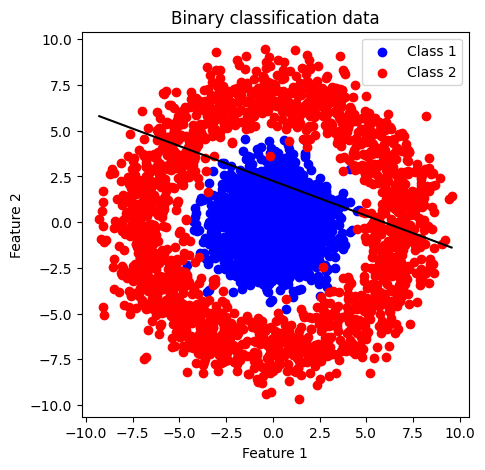

Accuracy of linearly separable data (Neural_network) 49.25


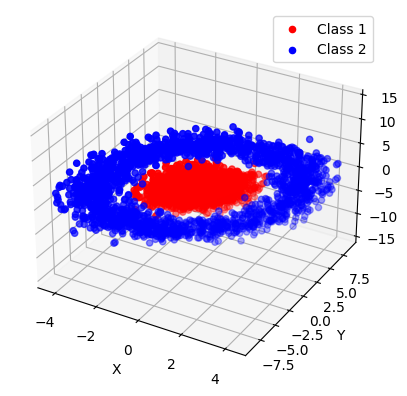

In [34]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################
X = np.hstack((np.ones((len(tr_data2), 1)), tr_data2))
X_te = np.hstack((np.ones((len(te_data2), 1)), te_data2))
w = Logistic(X,tr_targets2,X_te)
z = np.dot(X_te, w)
Y_pred = sigmoidal(z)
Y_pred = (Y_pred >= 0.5).astype(int)
acc = np.mean(te_targets2 == Y_pred)
print('Accuracy of linearly separable data (Logistic Regression)',acc*100)
y = tr_targets2
plt.figure(figsize=(5, 5))
plt.scatter(class1_tr2[:, 0], class1_tr2[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr2[:, 0], class2_tr2[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
x_values = np.array([np.min(tr_data2[:, 0]), np.max(tr_data2[:, 0])])
y_values = -(w[0] + w[1] * x_values) / w[2]
plt.plot(x_values, y_values, label='Decision Boundary', color='black')
plt.show()

##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################

weights = train_network(tr_data2,tr_targets2,LeakyReLU,LeakyRelu_gradient,0.9,0.001,10,128)
#Compute outputs on validation data
# print('W1 ',weights)
voutputs = fwdPropagate(te_data2.T, weights,LeakyReLU)
val_outputs = voutputs[0]
#Compute validation accuracy, and validation error
val_predictions = np.argmax(val_outputs, axis=0)
val_accuracy = np.mean(val_predictions == te_targets2)
val_error = 1 - val_accuracy
print('Accuracy of linearly separable data (Neural_network)',val_accuracy*100)
z1 = weights[0] @ class1_tr2.T

z2 = weights[0] @ class2_tr2.T

fig = plt.figure()
ax = fig.add_subplot(111 , projection = '3d')
ax.scatter(z1[0], z1[1], z1[2], c='r', marker='o', label='Class 1')
ax.scatter(z2[0], z2[1], z2[2], c='b', marker='o', label='Class 2')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################










<b> Report your observations </b>

1.Logistic Regression fails in linearly separating non-linear separable data ,it separates linear separable data properly

2.DNN separtes both non-linear separable and linear seperable data

3.Accuracy for DNN is more than logistic regression

